In [1]:
!pip install opencv-contrib-python
!pip install mediapipe
import math
import cv2
import numpy as np
from time import time
import mediapipe as mp
import matplotlib.pyplot as plt

In [4]:
# Initalising mediapipe pose class
mp_pose = mp.solutions.pose

#Setting up the Pose function
pose = mp_pose.Pose(static_image_mode = True,min_detection_confidence=0.3,model_complexity=2)

#Initalising mediapipe drawing class useful for annotation
mp_drawing = mp.solutions.drawing_utils

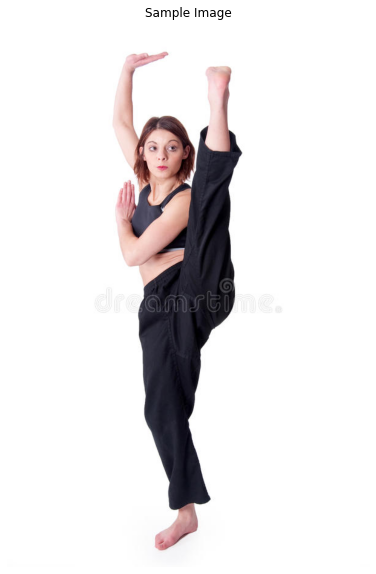

In [5]:
#Read an image from the specified path
sample_img = cv2.imread('/Users/anura/Desktop/sample_project_1/Image2.png')

#Specify a size of the figure
plt.figure(figsize=[10,10])

# Display the sample image, also convert BGR to RGB for display
plt.title("Sample Image");plt.axis('off');plt.imshow(sample_img[:,:,::-1]);plt.show()

In [6]:
#Perform Pose Detection
results = pose.process(cv2.cvtColor(sample_img,cv2.COLOR_BGR2RGB))

#Check if any landmarks are found
if results.pose_landmarks:
    #Iterate two times as we only want to display first two landmarks
    for i in range(2):
        #Display the found normalized landmarks
        print(f'{mp_pose.PoseLandmark(i).name}:\n{results.pose_landmarks.landmark[mp_pose.PoseLandmark(i).value]}')

NOSE:
x: 0.42822638154029846
y: 0.24723316729068756
z: -0.46237918734550476
visibility: 0.9946448802947998

LEFT_EYE_INNER:
x: 0.4385128319263458
y: 0.22976408898830414
z: -0.427640438079834
visibility: 0.9915785789489746



In [7]:
# Retrive the height and width of the sample image
image_height, image_width, _ = sample_img.shape

if results.pose_landmarks:
    for i in range (2):
        print(f'{mp_pose.PoseLandmark(i).name}:')
        print(f'x:{results.pose_landmarks.landmark[mp_pose.PoseLandmark(i).value].x * image_width}')
        print(f'y:{results.pose_landmarks.landmark[mp_pose.PoseLandmark(i).value].y * image_height}')
        print(f'z:{results.pose_landmarks.landmark[mp_pose.PoseLandmark(i).value].z * image_width}')
        print(f'visibility: {results.pose_landmarks.landmark[mp_pose.PoseLandmark(i).value].visibility}\n')
        

NOSE:
x:256.9358289241791
y:222.5098505616188
z:-277.42751240730286
visibility: 0.9946448802947998

LEFT_EYE_INNER:
x:263.1076991558075
y:206.78768008947372
z:-256.5842628479004
visibility: 0.9915785789489746



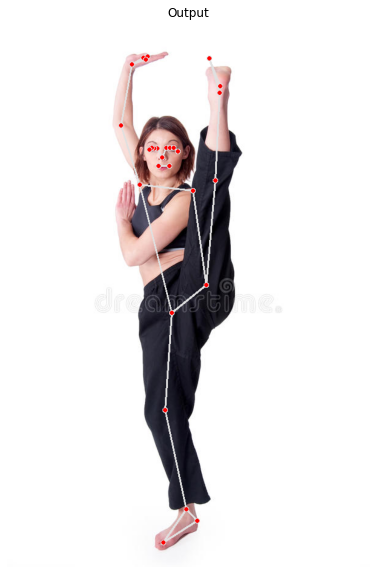

In [6]:
# majhe periods navhate yayla have aang dukhat aahe
img_copy = sample_img.copy()

#Check if any landmarks are found
if results.pose_landmarks:
    mp_drawing.draw_landmarks(image=img_copy,landmark_list = results.pose_landmarks,connections=mp_pose.POSE_CONNECTIONS)
    
    #Specify a size of the figure
    fig = plt.figure(figsize=[10,10])
    
    #Display the output image with the landmarks drwan also convert the image from BGR to RGB for display as mediapipipe uses RGB 
    # but opencv uses BGR
    plt.title("Output");plt.axis('off');plt.imshow(img_copy[:,:,::-1]);plt.show()

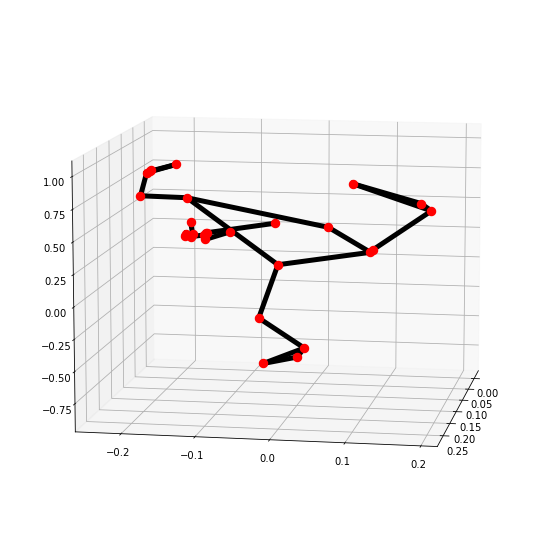

In [8]:
#Plot pose landmarks in 3D
mp_drawing.plot_landmarks(results.pose_world_landmarks,mp_pose.POSE_CONNECTIONS)

In [9]:
# this the pose detection will work on images as well as videos
def detectPose(image,pose,display=True):
    output_image = image.copy()
    
    #Convert the image from BGR to RGB format
    imageRGB = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
    
    #perform the pose detection
    results = pose.process(imageRGB)
    
    #Retrieve the heigh and width of the input image
    height,width,_ = image.shape
    
    #Initalize a list to share the detected landmarks
    landmarks = []
    
    #Check if any landmarks are detected
    if results.pose_landmarks:
        # Draw pose Lnadmarks on he output image
        mp_drawing.draw_landmarks(image=output_image,landmark_list = results.pose_landmarks,connections=mp_pose.POSE_CONNECTIONS)
        
        #Iterate over the detected landmarks
        for landmark in results.pose_landmarks.landmark:
             # apppend the landmark into the list
                landmarks.append((int(landmark.x*width),int(landmark.y*height),(landmark.z * width)))
        
        # Check if the original input image and the resultant image are specified to be displayed
        if display:
            #Display the original input image and the resultant image
            plt.figure(figsize=[22,22])
            plt.subplot(121);plt.imshow(image[:,:,::-1]);plt.title("Original Image");plt.axis('off');
            plt.subplot(122);plt.imshow(output_image[:,:,::-1]);plt.title("Output Image");plt.axis('off');
            
            #Also plot the pose landmarks in 3D
            mp_drawing.plot_landmarks(results.pose_world_landmarks,mp_pose.POSE_CONNECTIONS)
        
        #Otherwise
        else: 
            #Return the output image and the format landmarks
            return output_image, landmarks
            

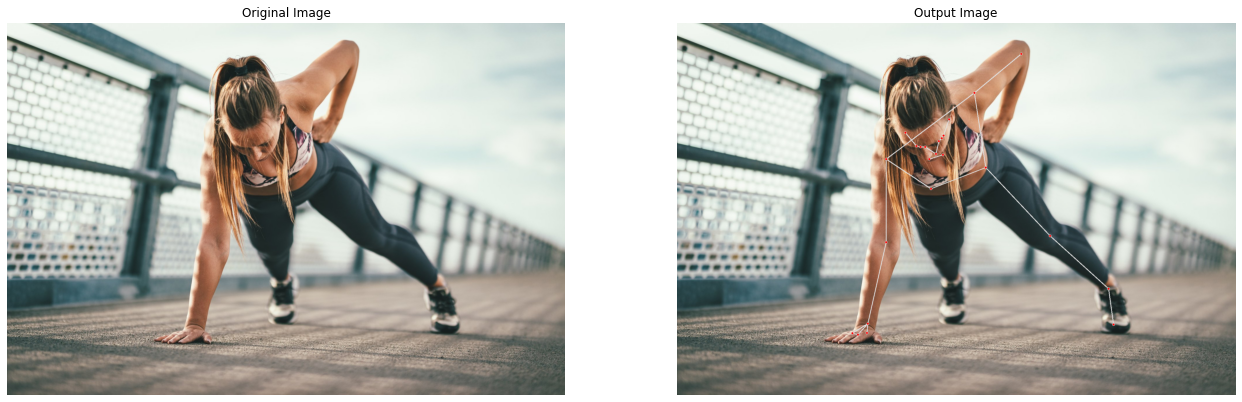

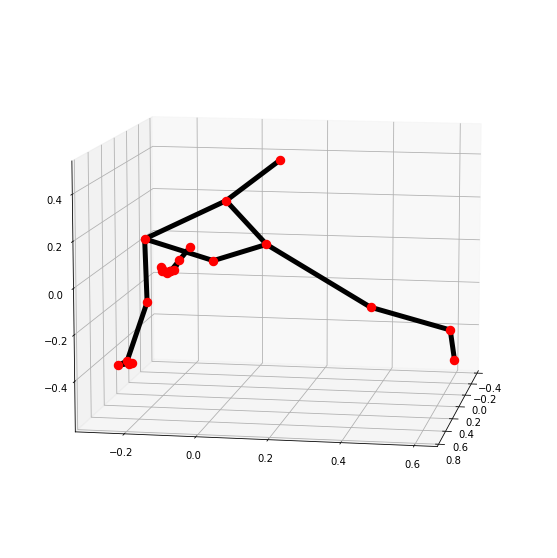

In [29]:
# Read another sample image and perform pose detection on it
image = cv2.imread('/Users/anura/Desktop/sample_project_1/Image3.png')
detectPose(image,pose,display=True)

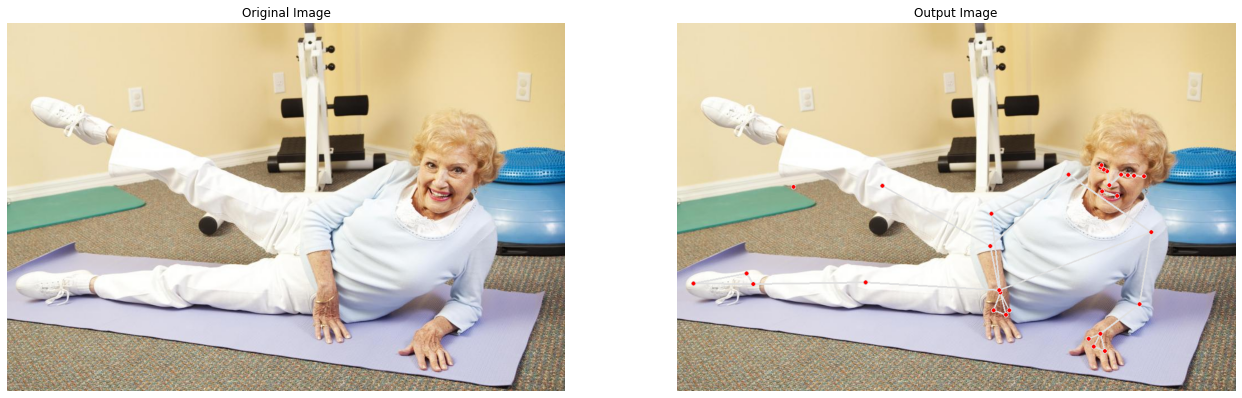

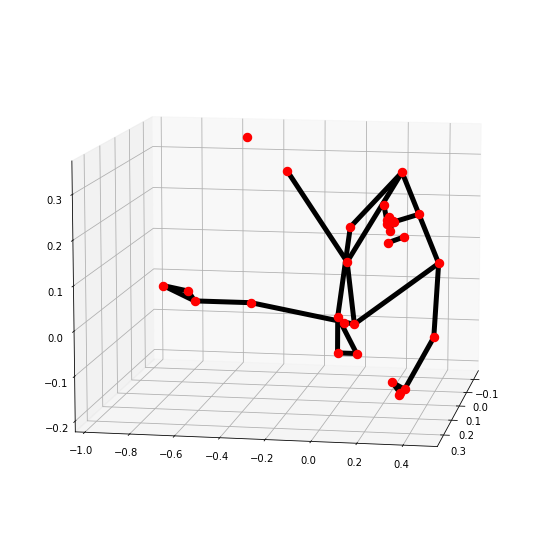

In [30]:
# Trying this on another image
image = cv2.imread('/Users/anura/Desktop/sample_project_1/Image4.png')
detectPose(image,pose,display=True)

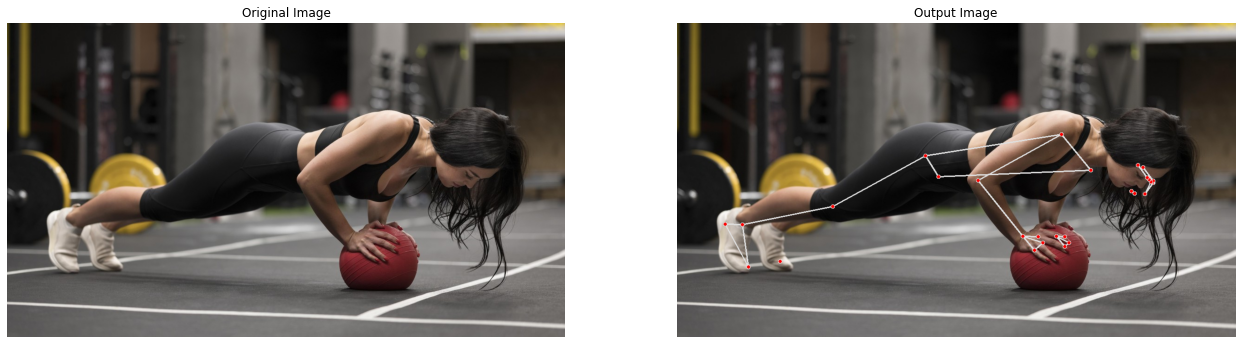

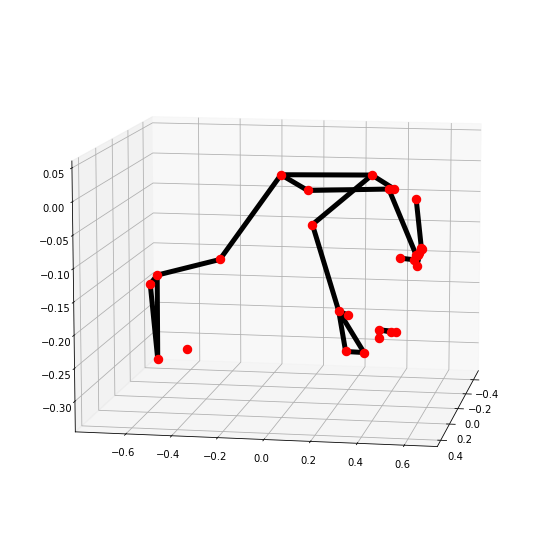

In [31]:
image = cv2.imread('/Users/anura/Desktop/sample_project_1/Image5.png')
detectPose(image,pose,display=True)

In [32]:
#Pose detection on real-time webcam feed/video
# Setup pose function for video
pose_video = mp_pose.Pose(static_image_mode=False,min_detection_confidence=0.5,model_complexity=2)

#Intitialze the videocapture object to read from teh webcam
video = cv2.VideoCapture(0)

#Create named window for resizing purposes
cv2.namedWindow('Pose Detection',cv2.WINDOW_NORMAL)

#Initialize the Videocature object to read from a video stored in the disk
# video = cv2.VideoCapture('/Users/anura/Desktop/sample_project_1/13monthanniversary.mp4')

#Set video camera size
video.set(3,1280)
video.set(4,960)

#Initalize a variable to share the time of the previous frame
time1 = 0

#iterate until the video is accessed successfully
while video.isOpened():
    #read a frame
    ok, frame = video.read()
    
    #Check if frame is not read properly
    if not ok:
        #Break the loop
        break
    
    #Flip the frame horizontally for natural (selfie-view) visualisation
    frame = cv2.flip(frame,1)
    
    # get the width and height of the frame
    frame_height,frame_width, _ = frame.shape
    
    #Resize the frame while keepin the aspect ratio
    frame = cv2.resize(frame,(int(frame_width * (640/frame_height)),640))
    
    #Perform pose landmark detection
    frame, _ = detectPose(frame,pose_video,display=False)
    
    # Set the time for this frame to the current time
    time2 = time()
    
    #Check if the difference between the previous and this frame time > 0  to avoid division by zero
    if(time2 - time1) > 0:
        #Calculate the nu,be rof frames per second
        frames_per_second = 1.0 / (time2-time1)
        
        # write the calculated number of frames per second on the frame
        cv2.putText(frame,'FPS: {}'.format(int(frames_per_second)),(10,30),cv2.FONT_HERSHEY_PLAIN,2,(0,255,0),3)
    
    #Update the previous frame time to this frame time
    #As this frame will become previous frame in next iteration
    time1 = time2
    
    #Display the frame
    cv2.imshow('Pose Detection',frame)
    
    #Wait unitil a key is pressed
    # Retrieve the ASCII code of the key pressed
    k = cv2.waitKey(1) & 0xFF
    
    #Check if 'ESC' is pressed
    if(k==27):
        # Break the loop
        break

#Release the VideoCapture object
video.release()

# close the window
cv2.destroyAllWindows()

In [33]:
# here we using heuristics and by that calculatig the angle between any three points and then using that agle to idnetify poses
def calculateAngle(landmark1,landmark2,landmark3):
    #get the required landmarks coordinates
    x1,y1, _ = landmark1
    x2,y2, _ = landmark2
    x3,y3, _ = landmark3
    
    #Calculate the angle between the three points
    angle = math.degrees(math.atan2(y3-y2,x3-x2) - math.atan2(y1-y2,x1-x2))
    
    #Check if the angle is less than zero
    if angle < 0:
        # Add 360 to the found angle
        angle += 360
    
    #return the calculated angle
    return angle

In [34]:
# Calculate the angle between the three landmarks
angle = calculateAngle((558,326,0),(642,333,0),(718,321,0))

#Display the calculated angle
print(f'The calculated angle is {angle}')

The calculated angle is 166.26373169437744


In [68]:
def classifyPose(landmarks, output_image, display=False):
    '''
    This function classifies yoga poses depending upon the angles of various body joints.
    Args:
        landmarks: A list of detected landmarks of the person whose pose needs to be classified.
        output_image: A image of the person with the detected pose landmarks drawn.
        display: A boolean value that is if set to true the function displays the resultant image with the pose label 
        written on it and returns nothing.
    Returns:
        output_image: The image with the detected pose landmarks drawn and pose label written.
        label: The classified pose label of the person in the output_image.
 
    '''
    
    # Initialize the label of the pose. It is not known at this stage.
    label = 'Unknown Pose'
 
    # Specify the color (Red) with which the label will be written on the image.
    color = (0, 0, 255)
    
    # Calculate the required angles.
    #----------------------------------------------------------------------------------------------------------------
    
    # Get the angle between the left shoulder, elbow and wrist points. 
    left_elbow_angle = calculateAngle(landmarks[mp_pose.PoseLandmark.LEFT_SHOULDER.value],
                                      landmarks[mp_pose.PoseLandmark.LEFT_ELBOW.value],
                                      landmarks[mp_pose.PoseLandmark.LEFT_WRIST.value])
    
    # Get the angle between the right shoulder, elbow and wrist points. 
    right_elbow_angle = calculateAngle(landmarks[mp_pose.PoseLandmark.RIGHT_SHOULDER.value],
                                       landmarks[mp_pose.PoseLandmark.RIGHT_ELBOW.value],
                                       landmarks[mp_pose.PoseLandmark.RIGHT_WRIST.value])   
    
    # Get the angle between the left elbow, shoulder and hip points. 
    left_shoulder_angle = calculateAngle(landmarks[mp_pose.PoseLandmark.LEFT_ELBOW.value],
                                         landmarks[mp_pose.PoseLandmark.LEFT_SHOULDER.value],
                                         landmarks[mp_pose.PoseLandmark.LEFT_HIP.value])
 
    # Get the angle between the right hip, shoulder and elbow points. 
    right_shoulder_angle = calculateAngle(landmarks[mp_pose.PoseLandmark.RIGHT_HIP.value],
                                          landmarks[mp_pose.PoseLandmark.RIGHT_SHOULDER.value],
                                          landmarks[mp_pose.PoseLandmark.RIGHT_ELBOW.value])
 
    # Get the angle between the left hip, knee and ankle points. 
    left_knee_angle = calculateAngle(landmarks[mp_pose.PoseLandmark.LEFT_HIP.value],
                                     landmarks[mp_pose.PoseLandmark.LEFT_KNEE.value],
                                     landmarks[mp_pose.PoseLandmark.LEFT_ANKLE.value])
 
    # Get the angle between the right hip, knee and ankle points 
    right_knee_angle = calculateAngle(landmarks[mp_pose.PoseLandmark.RIGHT_HIP.value],
                                      landmarks[mp_pose.PoseLandmark.RIGHT_KNEE.value],
                                      landmarks[mp_pose.PoseLandmark.RIGHT_ANKLE.value])
    
    #----------------------------------------------------------------------------------------------------------------
    
    # Check if it is the warrior II pose or the T pose.
    # As for both of them, both arms should be straight and shoulders should be at the specific angle.
    #----------------------------------------------------------------------------------------------------------------
    
    # Check if the both arms are straight.
    if left_elbow_angle > 165 and left_elbow_angle < 195 and right_elbow_angle >165 and right_elbow_angle < 195:
 
        # Check if shoulders are at the required angle.
        if left_shoulder_angle > 80 and left_shoulder_angle < 110 and right_shoulder_angle > 80 and right_shoulder_angle < 120:
 
        # Check if it is the warrior II pose.
        #----------------------------------------------------------------------------------------------------------------
 
            # Check if one leg is straight.
            if left_knee_angle > 165 and left_knee_angle < 195 or right_knee_angle > 165 and right_knee_angle < 195:
 
                # Check if the other leg is bended at the required angle.
                if left_knee_angle > 90 and left_knee_angle < 120 or right_knee_angle > 90 and right_knee_angle < 120:
 
                    # Specify the label of the pose that is Warrior II pose.
                    label = 'Warrior II Pose' 
                        
    #----------------------------------------------------------------------------------------------------------------
    
    # Check if it is the T pose.
    #----------------------------------------------------------------------------------------------------------------
    
            # Check if both legs are straight
            if left_knee_angle > 160 and left_knee_angle < 195 and right_knee_angle > 160 and right_knee_angle < 195:
 
                # Specify the label of the pose that is tree pose.
                label = 'T Pose'
 
    #----------------------------------------------------------------------------------------------------------------
    
    # Check if it is the tree pose.
    #----------------------------------------------------------------------------------------------------------------
    
    # Check if one leg is straight
    if left_knee_angle > 165 and left_knee_angle < 195 or right_knee_angle > 165 and right_knee_angle < 195:
 
        # Check if the other leg is bended at the required angle.
        if left_knee_angle > 315 and left_knee_angle < 335 or right_knee_angle > 25 and right_knee_angle < 45:
 
            # Specify the label of the pose that is tree pose.
            label = 'Tree Pose'
                
    #----------------------------------------------------------------------------------------------------------------
    
    # Check if the pose is classified successfully
    if label != 'Unknown Pose':
        
        # Update the color (to green) with which the label will be written on the image.
        color = (0, 255, 0)  
    
    # Write the label on the output image. 
    cv2.putText(output_image, label, (10, 30),cv2.FONT_HERSHEY_PLAIN, 2, color, 2)
    
    # Check if the resultant image is specified to be displayed.
    if display:
    
        # Display the resultant image.
        plt.figure(figsize=[10,10])
        plt.imshow(output_image[:,:,::-1]);plt.title("Output Image");plt.axis('off');
        
    else:
        
        # Return the output image and the classified label.
        return output_image, label

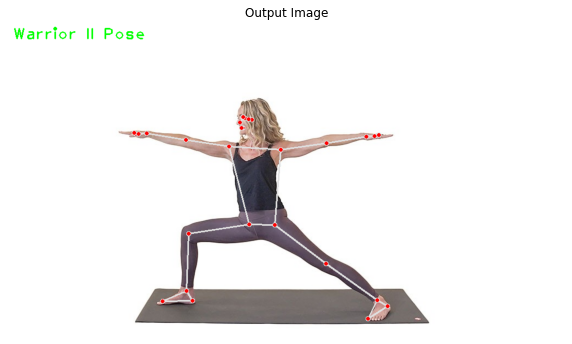

In [69]:
# Waaruior II pose
image = cv2.imread('/Users/anura/Desktop/sample_project_1/WarriorII_ColleenSaidman.jpg')
output_image, landmarks = detectPose(image,pose,display=False)
if landmarks:
    classifyPose(landmarks,output_image,display=True)

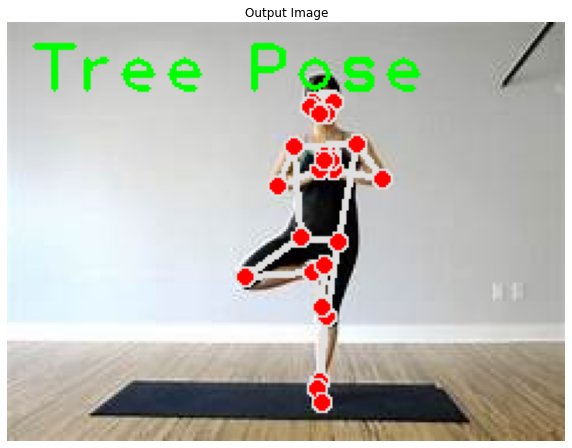

In [70]:
image = cv2.imread('/Users/anura/Desktop/sample_project_1/Treepose.jpg')
output_image, landmarks = detectPose(image,pose,display=False)
if landmarks:
    classifyPose(landmarks,output_image,display=True)

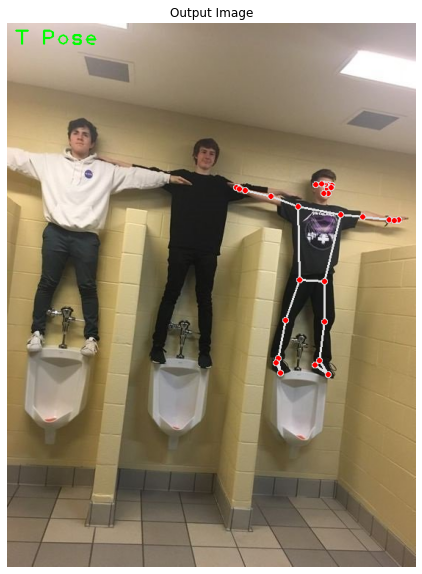

In [71]:
# trying the output pose for the T pose
image = cv2.imread('/Users/anura/Desktop/sample_project_1/74c.jpg')
output_image, landmarks = detectPose(image,pose,display=False)
if landmarks:
    classifyPose(landmarks,output_image,display=True)

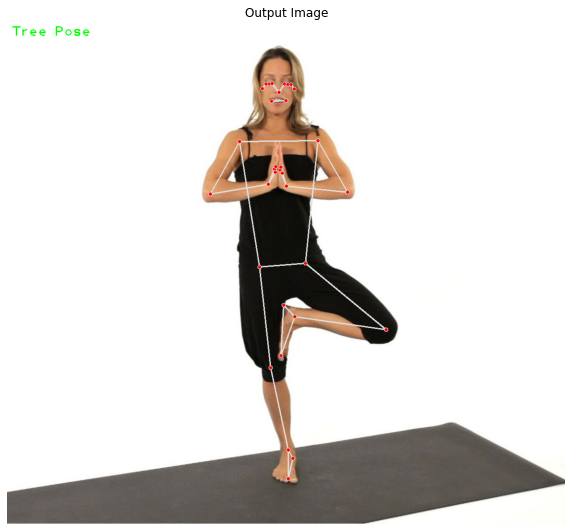

In [72]:
image = cv2.imread('/Users/anura/Desktop/sample_project_1/tree2.jpg')
output_image, landmarks = detectPose(image,pose,display=False)
if landmarks:
    classifyPose(landmarks,output_image,display=True)

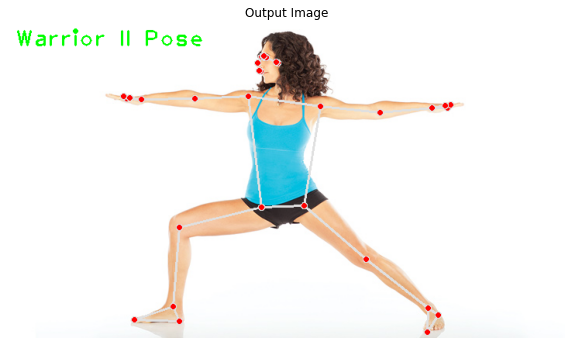

In [73]:
# warrior 2 pose
image = cv2.imread('/Users/anura/Desktop/sample_project_1/warrior4.jpg')
output_image, landmarks = detectPose(image,pose,display=False)
if landmarks:
    classifyPose(landmarks,output_image,display=True)

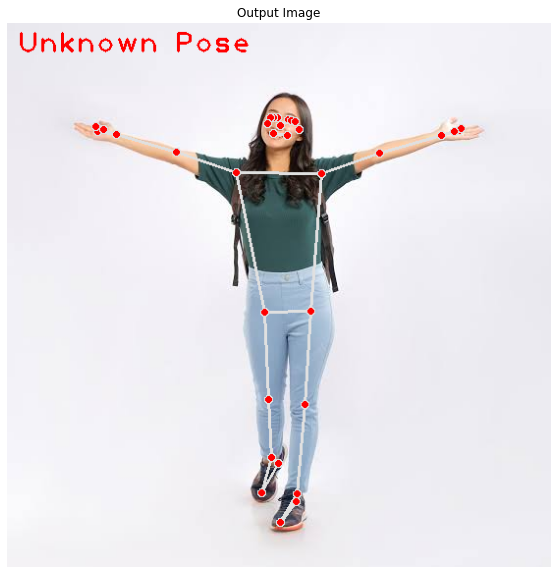

In [74]:
# t- pose
image = cv2.imread('/Users/anura/Desktop/sample_project_1/tpose3.jpg')
output_image, landmarks = detectPose(image,pose,display=False)
if landmarks:
    classifyPose(landmarks,output_image,display=True)

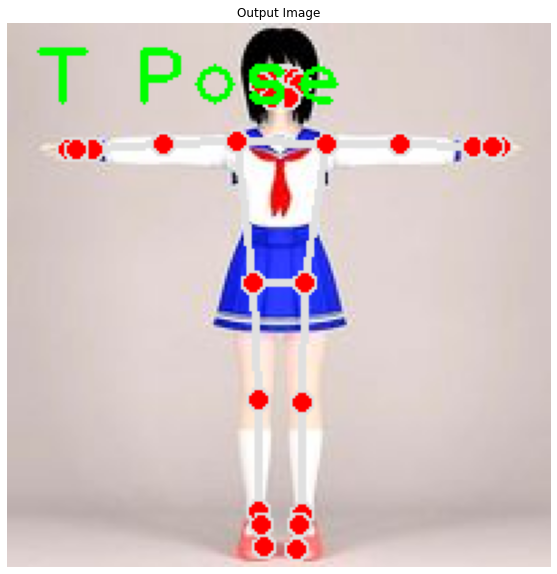

In [75]:
image = cv2.imread('/Users/anura/Desktop/sample_project_1/tpose6.jpg')
output_image, landmarks = detectPose(image,pose,display=False)
if landmarks:
    classifyPose(landmarks,output_image,display=True)

In [ ]:
# pose classification on real time webcam feed
# Initialize the VideoCapture object to read from the webcam.
camera_video = cv2.VideoCapture(0)
 
# Initialize a resizable window.
cv2.namedWindow('Pose Classification', cv2.WINDOW_NORMAL)
 
# Iterate until the webcam is accessed successfully.
while camera_video.isOpened():
    
    # Read a frame.
    ok, frame = camera_video.read()
    
    # Check if frame is not read properly.
    if not ok:
        
        # Continue to the next iteration to read the next frame and ignore the empty camera frame.
        continue
    
    # Flip the frame horizontally for natural (selfie-view) visualization.
    frame = cv2.flip(frame, 1)
    
    # Get the width and height of the frame
    frame_height, frame_width, _ =  frame.shape
    
    # Resize the frame while keeping the aspect ratio.
    frame = cv2.resize(frame, (int(frame_width * (640 / frame_height)), 640))
    
    # Perform Pose landmark detection.
    frame, landmarks = detectPose(frame, pose_video, display=False)
    
    # Check if the landmarks are detected.
    if landmarks:
        
        # Perform the Pose Classification.
        frame, _ = classifyPose(landmarks, frame, display=False)
    
    # Display the frame.
    cv2.imshow('Pose Classification', frame)
    
    # Wait until a key is pressed.
    # Retreive the ASCII code of the key pressed
    k = cv2.waitKey(1) & 0xFF
    
    # Check if 'ESC' is pressed.
    if(k == 27):
        
        # Break the loop.
        break
 

camera_video.release()
cv2.destroyAllWindows()